# Проект: Статистический анализ данных 

## Описание данных. 

**Пользователи — users_go.csv**
+ user_id - уникальный идентификатор пользователя
+ name - 	имя пользователя
+ age -	возраст
+ city -	город
+ subscription_type -	тип подписки (free, ultra)

**Поездки — rides_go.csv**
+ user_id	- уникальный идентификатор пользователя
+ distance -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
+ duration -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
+ date -	дата совершения поездки

**Подписки — subscriptions_go.csv**
+ subscription_type -	тип подписки
+ minute_price -	стоимость одной минуты поездки по данной подписке
+ start_ride_price -	стоимость начала поездки
+ subscription_fee -	стоимость ежемесячного платежа

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
+ абонентская плата отсутствует;
+ стоимость одной минуты поездки — 8 рублей;
+ стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra
+ абонентская плата — 199 рублей в месяц;
+ стоимость одной минуты поездки — 6 рублей;
+ стоимость старта — бесплатно.

**Цель иследования:**
    
   1. Определить вырочку с подпиской и без подписки; 
   2. Проверить: тратять ли пользователи с подпиской больше, чем пользователи без подниски;
   3. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
   4. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Ход иследования:**
Данные о поездах, пользователях и подписках я получу из файлов : `users_go.csv`, `rides_go.csv`, `subscriptions_go.csv`. 
О качестве данных ничего не известно. Перед тем как приступить к анализу данных, следует предобработать датасеты, а именно проверить на пропуски, дубликаты, неверные значения и другое.


Таким образом моё иследование пройдет в 7 этапов:
   + Описание данных. В данном разделе опишим данные которые есть в дататсетах и определимся с планом работы.
   + Загрузка данных. Загрузим данные из всех датасетов и оценим данные с которыми будем работать. Импортируем библиотеки.
   + Предобработка данных. Выявим пропуски, дубликаты и аномальные значения, если такие имеются. Приведем данные в сооответствие.
   + Исследуем данные. (частота встречаемости города, соотвношение пользователей, возраст пользователей, продолжительность поездки и расстояние)
   + Объединим данные, проверив совместимость датасетов. После проведем повторную проверки на пропуски и дубликаты.
   + Рассчитаем выручку по формуле, используя сводную таблицу.
   + Проверим гипотезы представленные в задаче с помощью t-test(ов)
   + Решим немного задач
   + Написание вывода

## Загрузка данных. 

In [1]:
#Импортируем библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy import stats as st
import warnings
import matplotlib.ticker as ticker
from math import factorial

In [7]:
users = pd.read_csv('users_go.csv')
display(users.head())
rides = pd.read_csv('rides_go.csv')
display(rides.head())
subscriptions = pd.read_csv('subscriptions_go.csv')
display(subscriptions.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
users.info()
rides.info()
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

Вывод: 
+ Датасет **Пользователи** имеет 1565 строк и ни одного пропуска. Все строки имеют корректный тип для указанных в них данных.
+ Датасет **Поездки** имеет 18068 строк и ниодного пропуска в данных. Строка `data` имеет неверный тип данных - `object`. Следует изменить на тип `datatime`.
+ Датасет **Подписки** имеет 2 строки и ни одного пропуска. 

##  Предобработка данных.

In [9]:
# формат даты передадим методу to_datetime с помощью параметра format.
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
display(rides.head(5))
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [10]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
display(rides.head(5))

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [11]:
display(rides['date'].describe())
print('Рассматриваемый период от:', rides['date'].min())
print('Рассматриваемый период до:', rides['date'].max())

C:\Users\Admin\AppData\Local\Temp\ipykernel_19440\2469371744.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(rides['date'].describe())


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

Рассматриваемый период от: 2021-01-01 00:00:00
Рассматриваемый период до: 2021-12-30 00:00:00


**Проверим пропуски в каждой таблице отдельно**
+ users (Пользователи)

In [12]:
display('Количество пропусков в таблице "users":', users.isna().sum())
print('Количество дубликатов в таблице "users":', users.duplicated().sum())

'Количество пропусков в таблице "users":'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Количество дубликатов в таблице "users": 31


In [13]:
users_duplicated = users[users.duplicated()].head(10)
display(users_duplicated)

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Дубликаты в таблице `users` повторяют существующие поездки пользователей. Удалим их дня более корректного анализа.

In [14]:
users = users.drop_duplicates()
display(users.duplicated().sum())

0

+ rides (Поездки)

In [15]:
print('Количество пропусков в таблице "rides":', rides.isna().sum())
print('Количество дубликатов в таблице "rides":', rides.duplicated().sum())

Количество пропусков в таблице "rides": user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
Количество дубликатов в таблице "rides": 0


+ subscriptions (Тариф)

In [16]:
print('Количество пропусков в таблице "subscriptions":', subscriptions.isna().sum())
print('Количество дубликатов в таблице "subscriptions":',subscriptions.duplicated().sum())

Количество пропусков в таблице "subscriptions": subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
Количество дубликатов в таблице "subscriptions": 0


Вывод: Пропусков нет. Добавлен столбец 'month'. Удалены дубликаты из датасета `users`.

## Исследовательский анализ данных.

In [17]:
# Копирование значений, а не ссылок, через b = copy.deepcopy(a)
import copy

In [18]:
# Функция визуализации столбцов с количественными данными
def quantity_go(data, column, bins_num, xlabel, ylabel, title):
    print('Название столбца:', column)
    data[column].hist(bins=bins_num)
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    print('Описание датафрейма:')
    print(data[column].describe().round(0))

In [19]:
# Функция для более наглядного отображения значений
# 'ultra' и 'free' в поле 'subscription_type' разных датафреймов
def subscriptions_go_translate(data):
    result = copy.deepcopy(data)
    result.loc[result['subscription_type'] == True, 'subscription_type'] = 'ultra'
    result.loc[result['subscription_type'] == False, 'subscription_type'] = 'free'
    return result

subscriptions_go_translate(subscriptions).head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [20]:
def quality_go_groupby(data, column):
    if 'subscription_fee' in subscriptions.columns:
        result = subscriptions_go_translate(data).groupby([column])[column].agg(['count']).sort_values(by='count')
    else:
        result = data.groupby([column])[column].agg(['count']).sort_values(by='count')
    #result = data.groupby([column])[column].agg(['count']).sort_values(by='count')
    #, ascending=False)
    result['percent'] = result['count'] / result['count'].sum()
    return result

In [21]:
def quality_go(data, column, xlabel, ylabel, title):
    print('Название столбца:', column)
    go = quality_go_groupby(data, column)
    go.columns = {'Количество':'count', 'Доля':'percent'}
    
    #quality_go_groupby(data, column).plot(kind='bar')
    
    plt.barh(
        go.index, 
        go['Количество'].values
    )
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    
    print('Значения датафрейма:')
    print(go)
    print('\nОписание датафрейма:')
    print(go.describe())

### частота встречаемости городов

Название столбца: city


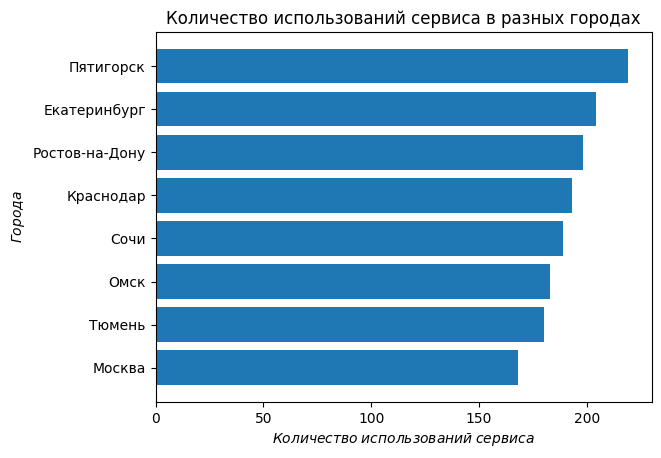

Значения датафрейма:
                Количество      Доля
city                                
Москва                 168  0.109518
Тюмень                 180  0.117340
Омск                   183  0.119296
Сочи                   189  0.123207
Краснодар              193  0.125815
Ростов-на-Дону         198  0.129074
Екатеринбург           204  0.132986
Пятигорск              219  0.142764

Описание датафрейма:
       Количество      Доля
count    8.000000  8.000000
mean   191.750000  0.125000
std     15.672998  0.010217
min    168.000000  0.109518
25%    182.250000  0.118807
50%    191.000000  0.124511
75%    199.500000  0.130052
max    219.000000  0.142764


In [22]:
quality_go(
    users, 
    'city', 
    'Количество_ использований_ сервиса', 
    'Города', 
    'Количество использований сервиса в разных городах'
)

Вывод: Чаще всего в Датасете встречается Пятигорск (226 значений), на втором месте Екатеринбург(206 значений). Меньше всего сервис используют в Москве (172 значения).

### соотношение пользователей с подпиской и без подписки

Название столбца: subscription_type


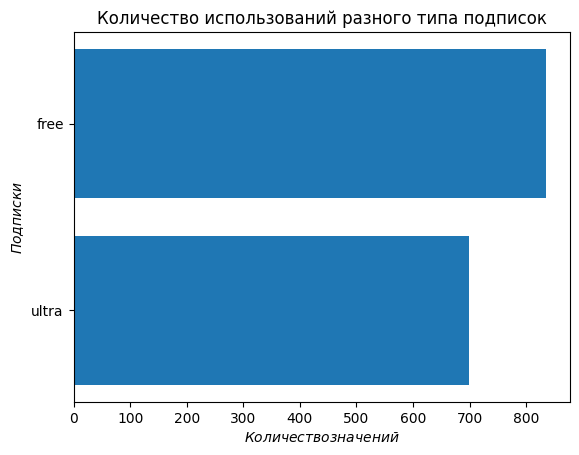

Значения датафрейма:
                   Количество      Доля
subscription_type                      
ultra                     699  0.455671
free                      835  0.544329

Описание датафрейма:
       Количество      Доля
count    2.000000  2.000000
mean   767.000000  0.500000
std     96.166522  0.062690
min    699.000000  0.455671
25%    733.000000  0.477836
50%    767.000000  0.500000
75%    801.000000  0.522164
max    835.000000  0.544329


In [23]:
quality_go(
    users, 
    'subscription_type', 
    'Количество значений', 
    'Подписки', 
    'Количество использований разного типа подписок'
)

Вывод: Количество пользователей с подпиской на 130 значений меньше, чем без подписки. 

### возраст пользователей

Название столбца: age


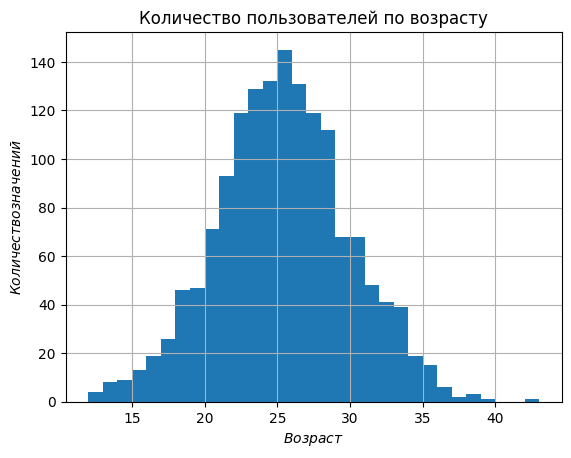

Описание датафрейма:
count    1534.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64


<AxesSubplot:xlabel='age'>

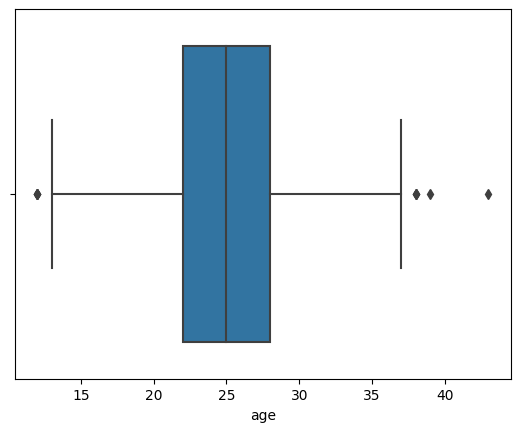

In [24]:
quantity_go(
    users, 
    'age', 
    users['age'].max()-users['age'].min(),
    'Возраст', 
    'Количество значений', 
    'Количество пользователей по возрасту'
)
sns.boxplot(x=  users['age'])

Вывод: Средний возраст пользователей - 25 лет. Стоит заметить, что среднее является модой и медианой.В данном случае, распределение является нормальным.

### расстояние, которое пользователь преодолел за одну поездку

Название столбца: distance


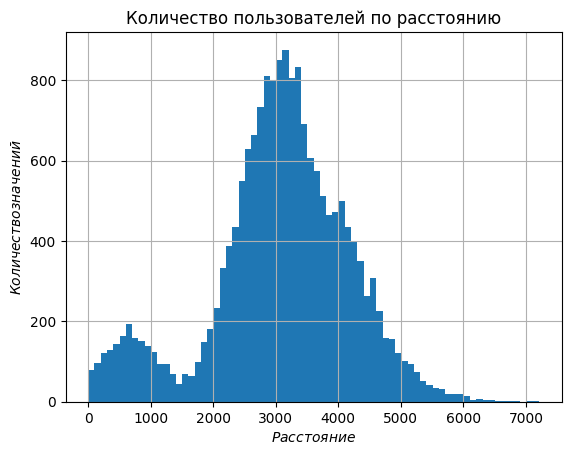

Описание датафрейма:
count    18068.0
mean      3071.0
std       1117.0
min          1.0
25%       2543.0
50%       3134.0
75%       3776.0
max       7211.0
Name: distance, dtype: float64


<AxesSubplot:xlabel='distance'>

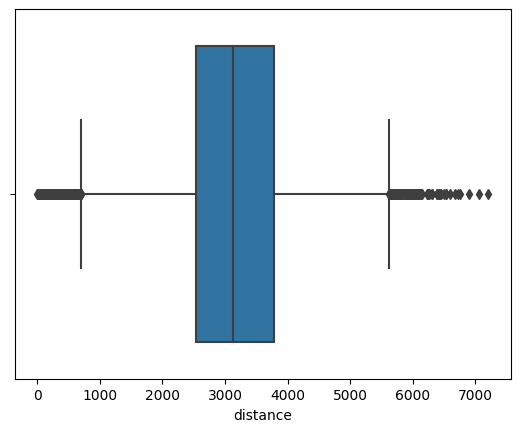

In [25]:
quantity_go(
    rides, 
    'distance', 
    int((rides['distance'].max()-rides['distance'].min()) / 100),
    'Расстояние', 
    'Количество значений', 
    'Количество пользователей по расстоянию'
)
sns.boxplot(x= rides['distance'])

Вывод: За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.

### продолжительность поездок

Название столбца: duration


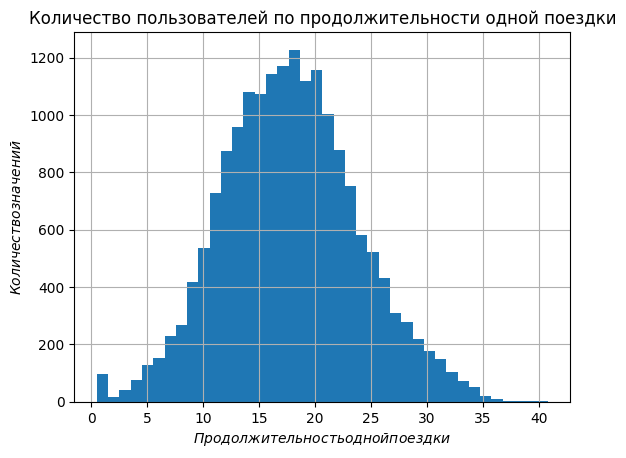

Описание датафрейма:
count    18068.0
mean        18.0
std          6.0
min          0.0
25%         14.0
50%         18.0
75%         22.0
max         41.0
Name: duration, dtype: float64


<AxesSubplot:xlabel='duration'>

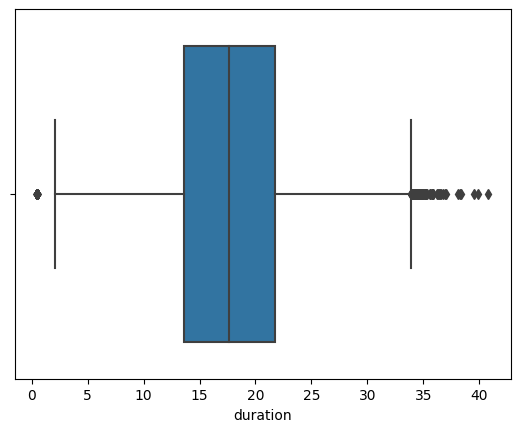

In [26]:
quantity_go(
    rides, 
    'duration', 
    int((rides['duration'].max()-rides['duration'].min())),
    'Продолжительность одной поездки', 
    'Количество значений', 
    'Количество пользователей по продолжительности одной поездки'
)

sns.boxplot(x= rides['duration'])

Вывод: Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением.

## Объединение данных

In [27]:
#users.shape()
#rides.shape()
#subscriptions.shape()

# Можем посмотреть размерность через метод info(), но мы уже смотрели.
users.info()
rides.info()
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
<class 'panda

Вывод: 
+ Количество строк в `users` = 1534
+ Количество строк в `rides` = 18068
+ Количество строк в `subscriptions` = 2 

Объединить таблицы мы можем первую и вторую по столбцу `user_id`. Добавляем к таблице `users`, таблицу `rides`. После чего добавим таблицу `subscriptions` по столбцу `subscription_type`.
    

In [28]:
# Общая таблица с данными
total = users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type')
display(total.head())
total.info()
print('Количество пропущенных значений:', total.isna().sum())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB
Количество пропущенных значений: user_id

In [29]:
print("Количество строк (поездок) в 'rides':", rides['user_id'].count())
print("Количество строк (поездок) в 'total':", total['user_id'].count())
print()
print("Количество уникальных пользователей в 'users':", len(users['user_id'].unique()))
print("Количество уникальных пользователей в 'total':", len(total['user_id'].unique()))

Количество строк (поездок) в 'rides': 18068
Количество строк (поездок) в 'total': 18068

Количество уникальных пользователей в 'users': 1534
Количество уникальных пользователей в 'total': 1534


In [30]:
display(total.describe())

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,17.805011,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831209,6.091051,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.855683,0.500000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,13.597563,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,17.678395,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,21.724800,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,40.823963,12.000000,8.000000,50.000000,199.000000


Вывод: Всего пользователей с подпиской и без 18388. Средний возраст - 25 лет. Расстояние, которые проезжают пользователи от 0,85 метров до  7211 метров на одну поездку.

### Изучение данных без подписки

In [31]:
#Пользователи без подписки
total_free = total.query('subscription_type == "free"')
print(display(total_free.head()))
print(display(total_free.describe())) 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


None


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


None


Вывод: Всего пользователей и без подписки 11716. Средний возраст - 25 лет. Расстояние, которые проезжают пользователи от 0,85 метров до  7211 метров на одну поездку.  Пока что ничего не меняется, посмотрим на информацию с подпиской. 

### Изучение данных с подпиской

In [32]:
#Пользователи с подпиской 
total_ultra = total.query('subscription_type == "ultra"')
print(display(total_ultra.head()))

print(display(total_ultra.describe())) 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


None


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


None


Вывод: Всего пользователей и c подпиской 6672. Средний возраст - 25 лет. Расстояние, которые проезжают пользователи от 244,2 метра до  5699,8 метров за одну поездку. 

### Разница показателей с подпиской и без

In [33]:
print("Разница описательных значений столбцов с числовыми данными датафреймов 'total_ultra' и 'total_free'") 
total_free.describe() - total_ultra.describe()

Разница описательных значений столбцов с числовыми данными датафреймов 'total_ultra' и 'total_free'


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.0,5068.0,5068.0
mean,771.801846,0.000711,-69.950106,-1.151076,0.100687,2.0,50.0,-199.0
std,40.066290,-0.276108,409.278476,0.754755,0.035154,0.0,0.0,0.0
min,699.000000,0.000000,-243.354755,-3.260353,0.000000,2.0,50.0,-199.0
25%,740.000000,0.000000,-418.881328,-1.566217,0.000000,2.0,50.0,-199.0
50%,772.000000,0.000000,-33.988764,-0.851263,1.000000,2.0,50.0,-199.0
75%,803.000000,0.000000,345.123469,-0.290058,0.000000,2.0,50.0,-199.0
max,835.000000,5.000000,1511.238083,-5.875464,0.000000,2.0,50.0,-199.0


Вывод: Без подписки кол-во пользователей на 5044 больше, чем с подпиской. 

Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’.

Максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’.

Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут

Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у подписчиков ‘free’ на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре.

### Расстояние и время поездки 

In [38]:
# Функция сравнения одинаковых столбцов 
def quantity_go_comp(data1, data2, column, bins_num, xlabel, ylabel, title, dataname1, dataname2):
    print('Сравнение столбцов:', column)
    
    data1.rename(columns = {column:dataname1})[dataname1].plot.hist(
        bins=bins_num, 
        #xlim=(data_min, data_max),
        alpha=.5, 
        legend=True,
        grid=True
    )
    data2.rename(columns = {column:dataname2})[dataname2].plot.hist(
        bins=bins_num, 
        #xlim=(data_min, data_max),
        alpha=.5, 
        legend=True,
        grid=True
    )
    
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()

Сравнение столбцов: distance


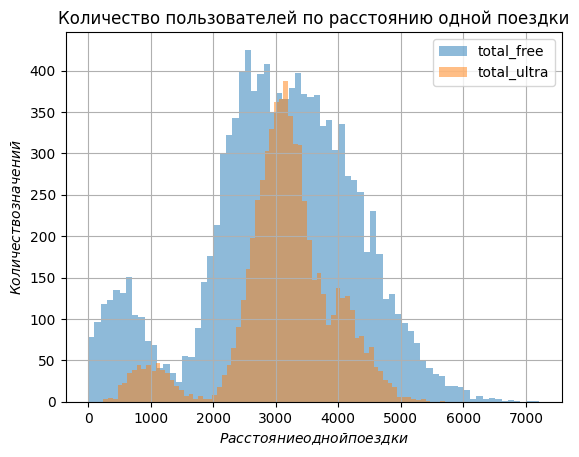

In [39]:
quantity_go_comp(
    total_free, 
    total_ultra,
    'distance',
    int((total['distance'].max()-total['distance'].min())/100),
    'Расстояние одной поездки', 
    'Количество значений', 
    'Количество пользователей по расстоянию одной поездки',
    'total_free', 
    'total_ultra',
)

Вывод: Дистанция поездок при использовании подписки ‘free’ более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’.

При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик ‘free’ в районе 700 метров, а основной 2500-3500 метров. В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.

Сравнение столбцов: duration


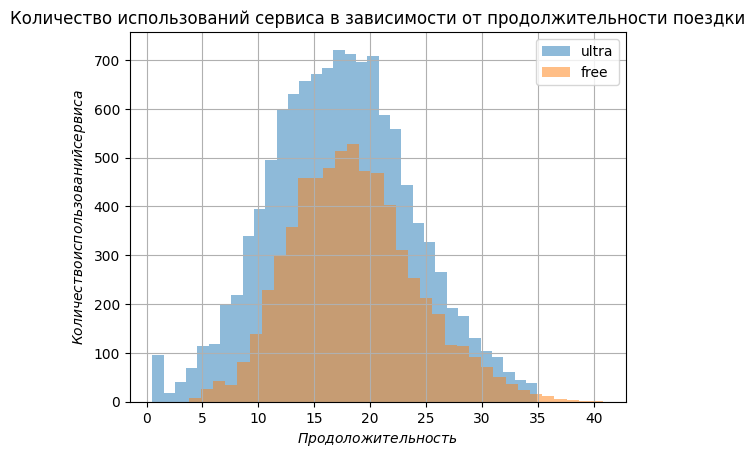

In [40]:
quantity_go_comp(
   total_free, 
    total_ultra, 
    'duration', 
    int((total_free['duration'].max())), 
    'Продоложительность', 
    'Количество  использований сервиса', 
    'Количество использований сервиса в зависимости от продолжительности поездки', 
    'ultra', 
    'free'
)

Вывод: Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.

## Подсчёт выручки

Помесячная выручка считается по формуле: 

Cтоимость старта поездки (start_ride_price) + количество поездок + стоимость одной минуты поездки(minute_price) + общая продолжительность всех поездок в минутах (duration) + стоимость подписки.

In [41]:
# Округление продолжительности поездок в 'duration'
total['duration'] = np.ceil(total['duration'])

In [42]:
users_months = total.pivot_table(index=('user_id', 'month'), values=('distance', 'duration', 'minute_price', 'start_ride_price', 
'subscription_fee'), aggfunc=('count', 'sum'))

# Переименование  столбцов
users_months.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]

# Удаление дублирующих столбцов с подсчитанным количеством строк 
users_months = users_months.drop(['count2', 'count3', 'count4', 'count5'], axis=1)

display(users_months.head())
print('Количество пропусков в сводной таблице:', users_months.isna().sum())

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0            12                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0            12                 0   
        10         2  5809.911100      32.0            12                 0   
        11         3  7003.499363      56.0            18                 0   

               subscription_fee  
user_id month                    
1       1                   398  
        4                   199  
        8                   398  
        10                  398  
        11                  597

Количество пропусков в сводной таблице: count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64


In [43]:
# Приведение столбцов с ценами к целевому состоянию
users_months['start_ride_price'] = users_months['start_ride_price'] / users_months['count']
users_months['minute_price'] = users_months['minute_price'] / users_months['count']
#users_months_go.loc[users_months_go['minute_price'] > 0] = 8
users_months['subscription_fee'] = users_months['subscription_fee'] / users_months['count']

users_months

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      16.0           8.0              50.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  
...                         ...  
1534    6                   0.0  
        8                   0.0  
        9                   0.0  
        11                  0.0  
        12                  0.0  

[11331 rows x 6 columns]

### Добавление выручки 

In [44]:
# Расчет и округление выручки
users_months['revenue'] = (
    (users_months['start_ride_price'] * users_months['count']) 
    + (users_months['minute_price'] * users_months['duration']) 
    + users_months['subscription_fee']
)

# Удаление столбцов
users_months = users_months.drop(['start_ride_price', 'minute_price'], axis=1)

print(display(users_months.head(10)))

count      distance  duration  subscription_fee  revenue
user_id month                                                          
1       1          2   7027.511294      42.0             199.0    451.0
        4          1    754.159807       7.0             199.0    241.0
        8          2   6723.470560      46.0             199.0    475.0
        10         2   5809.911100      32.0             199.0    391.0
        11         3   7003.499363      56.0             199.0    535.0
        12         2   6751.629942      28.0             199.0    367.0
2       3          3  10187.723006      63.0             199.0    577.0
        4          2   6164.381824      40.0             199.0    439.0
        6          1   3255.338202      14.0             199.0    283.0
        7          2   6780.722964      48.0             199.0    487.0

None


##  Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Нулевая и альтернативная гипотезы:

**Гипотеза Н0**: Средняя продолжительность поездок с подпиской ‘ultra’ и ‘free’ равна.

**Гипотеза Н1**: Средняя продолжительность поездок с подпиской ‘ultra’ больше, чем с подпиской ‘free’.

In [45]:
results = st.ttest_ind(total_ultra['duration'], total_free['duration'], equal_var=False, alternative='greater')
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Вывод: Не получилось отвергнуть нулевую гипотезу')

5.675781377128977e-37
Отвергаем нулевую гипотезу


### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая и альтернативная гипотезы:

**Гипотеза Н0**: Среднее расстояние поездки = 3130 метров.

**Гипотеза Н1**: Среднее расстояние поездки > 3130 метров.

In [46]:
results = st.ttest_1samp(total_ultra['distance'], 3130,  alternative='greater')
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Вывод: Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Вывод: Не получилось отвергнуть нулевую гипотезу


### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая и альтернативная гипотезы:

**Гипотеза Н0**: Среднее выручки с подпиской = средней выручки без подписки.

**Гипотеза Н1**: Среднее выручки с подпиской > выручки без подписки.

In [47]:
users_months.reset_index()[users_months.reset_index()['subscription_fee'] > 0]['revenue']

0       451.0
1       241.0
2       475.0
3       391.0
4       535.0
        ...  
4528    301.0
4529    469.0
4530    385.0
4531    295.0
4532    355.0
Name: revenue, Length: 4533, dtype: float64

In [48]:
results = st.ttest_ind(
    users_months.reset_index()[users_months.reset_index()['subscription_fee'] > 0]['revenue'], #Взяли срез по столбцу subscription_fee, где есть под
    users_months.reset_index()[users_months.reset_index()['subscription_fee'] == 0]['revenue'], #Взяли срез по столбцу subscription_fee, где нет под
    alternative='greater'
)
#Попробовать черз query
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Вывод: Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


###  Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Когда мы применяет т-тесты:
+ Выборочные средние нормально распределены (ЦПТ)
+ Дисперсии генеральной совокупности равны
+ Генеральный совокупности не зависят друг от друга.

В данном примере произошло обновление сервиса и генеральная совокупность изменилась. Применима гипотеза о равенстве средних для **зависимых выборок**.

`scipy.stats.ttets_rell()`

##  (необязательное задание). Распределения

### **Задача:**
 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [49]:
# Функция расчета количества успешных экспериментов Бернулли
# путем аппроксимации биномиального распределения нормальным
def ppf(n, p, x):
    # (расчет количества успешных экспериментов Бернулли 
    # путем аппроксимации биномиального распределения нормальным)
    
    # Параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    
    # x - вероятность расчитываемого значения
    
    # Расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # Расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # Расчет значения для заданной вероятности x
    result = distr.ppf(x)
    
    # Построение графика
    arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=result, color='green')
    plt.show()
    
    return result

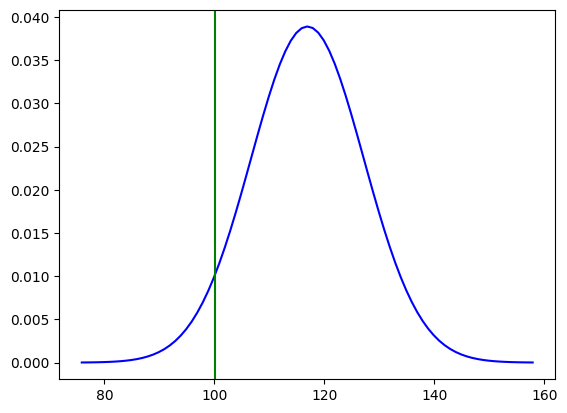

100.02841955223582

In [50]:
ppf (1169, .1, .05)

Требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.

### **Задача:**

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [51]:
# Функция расчета количества успешных экспериментов Бернулли
# путем аппроксимации биномиального распределения нормальным
def cdf(n, p, x):
    # (расчет количества успешных экспериментов Бернулли 
    # путем аппроксимации биномиального распределения нормальным)
    
    # Параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    
    # x - вероятность расчитываемого значения
    
    # Расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # Расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # Расчет значения для заданной вероятности x
    result = distr.cdf(x)
    
    # Построение графика
    arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=x, color='yellow')
    plt.show()
    

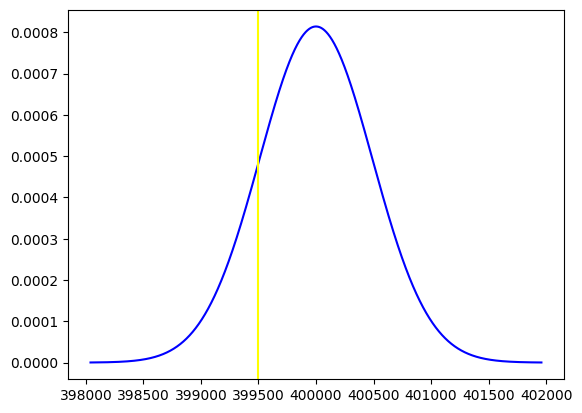

In [52]:
cdf(1000000, .4, 399500)

399.5 тыс. клиентов откроют уведомления с вероятностью 15.37%, если разослать 1 млн. уведомлений, которые открывают клиенты с вероятностью 40%.

##  Выводы:

В ходе  анализа данных было опредлено:

 + Пользователей с подпиской «free» всего 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
 + Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
 + Большая часть всех пользователей используют подписку «free». Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
 + Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.
 + За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.       +Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается выброс размером менее 100 поездок с продолжительностью в 1 минуту.
 
 
В результате группировки данных выявлено:

 + Поездок с исползьзованием подписки ‘free’ на 5068 больше, чем с использованием подписки ‘ultra’, и составляет 11568.
 + Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’.
 + Дистанция поездок при использовании подписки ‘free’ более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’. При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик ‘free’ в районе 700 метров, а основной 2500-3500 метров. В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.
 + Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.
 + Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у подписчиков ‘free’ на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской ‘free’ в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки ‘free’ нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.
 + Во всех городах доминирует подписка ‘free’. Пятигорск является лидером по использованию этиго типа подписки (1672 поездок). Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок).
 +  Гипотезу о том, что средняя продолжительность поездок с подпиской ‘ultra’ равна средней продолжительности с подпиской ‘free’ мы отвергли
 + Гипотезу о том, что среднее расстояние поездки с использованием подписки ‘ultra’ равно  3130 метрам не смогли отвергнуть. 
 + В ходе иследования была отвергнута гипотеза о том, что среднее выручки с подпиской равна средней выручки без подписки. Это значит, что в чаще всего среднее выручки с подпиской больше средней вырочки без подписки.

В задачах на распределение подсчитано:

+ Требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.
+ 399.5 тыс. клиентов откроют уведомления с вероятностью 15.37%, если разослать 1 млн. уведомлений, которые открывают клиенты с вероятностью 40%.


**Рекомендации по развитию сервиса аренды самокатов:**

+ Чтобы помочь бизнесу вырасти нужно предложить в городе Ростов-на-Дону  промокоды пользователям с подпиской о продлении подписки (так как с подпиской выручка компании больше.)
+ Так же в других городах, такие как Москва запустить рекламу о сервисе. Возможно о нем мало кто знает.
+ В Пятигорске выявить с помощью анализа пользователей, кто часто использует сервис и предложить им подписку.